In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import seaborn as sns
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abaziz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
# checking first 5 rows to understand dataset
df = pd.read_csv("./data/tweets_labelled.csv", delimiter=";")
print(df.head())

       id                 created_at  \
0   77522  2020-04-15 01:03:46+00:00   
1  661634  2020-06-25 06:20:06+00:00   
2  413231  2020-06-04 15:41:45+00:00   
3  760262  2020-07-03 19:39:35+00:00   
4  830153  2020-07-09 14:39:14+00:00   

                                                text sentiment  
0  RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...  positive  
1  #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...  negative  
2  Net issuance increases to fund fiscal programs...  positive  
3  RT @bentboolean: How much of Amazon's traffic ...  positive  
4  $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...  positive  


In [34]:
# getting dataset summary
print(df.info())

# check for any missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5000 non-null   int64 
 1   created_at  5000 non-null   object
 2   text        5000 non-null   object
 3   sentiment   1300 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB
None
id               0
created_at       0
text             0
sentiment     3700
dtype: int64


In [35]:
# after checking for missing values we notice that labels are missing for 3700 
# posts out of 5000, we can consider dropping them
df_drop_na = df.dropna().copy()
print(df_drop_na.isna().sum())
print(df_drop_na.info())

id            0
created_at    0
text          0
sentiment     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1300 non-null   int64 
 1   created_at  1300 non-null   object
 2   text        1300 non-null   object
 3   sentiment   1300 non-null   object
dtypes: int64(1), object(3)
memory usage: 50.8+ KB
None


In [36]:
# Checking destribution of sentiment labels
print(df["sentiment"].value_counts())

sentiment
positive    528
neutral     424
negative    348
Name: count, dtype: int64


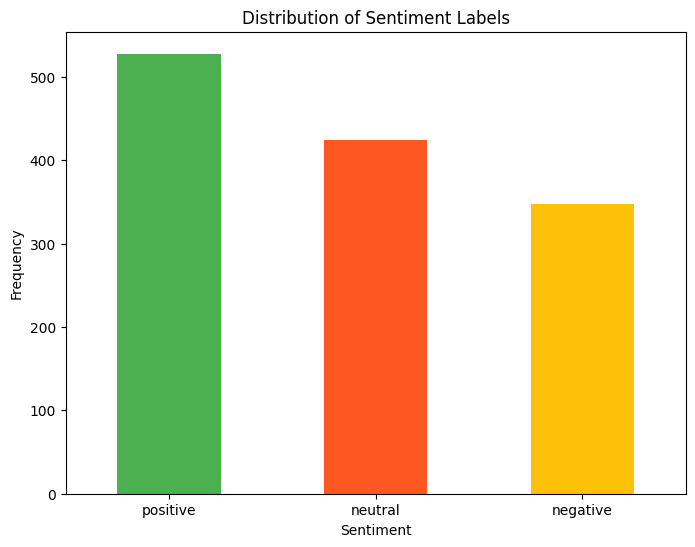

In [37]:
# Visualization of sentiment distribution
plt.figure(figsize=(8,6))
df["sentiment"].value_counts().plot(kind="bar", color=['#4CAF50', '#FF5722', '#FFC107'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [38]:
# text data exploration
# adding another column for text length 
df_drop_na["length"] = df_drop_na["text"].apply(len)
print(df_drop_na.head())

       id                 created_at  \
0   77522  2020-04-15 01:03:46+00:00   
1  661634  2020-06-25 06:20:06+00:00   
2  413231  2020-06-04 15:41:45+00:00   
3  760262  2020-07-03 19:39:35+00:00   
4  830153  2020-07-09 14:39:14+00:00   

                                                text sentiment  length  
0  RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...  positive     144  
1  #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...  negative     274  
2  Net issuance increases to fund fiscal programs...  positive     222  
3  RT @bentboolean: How much of Amazon's traffic ...  positive     140  
4  $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...  positive     129  


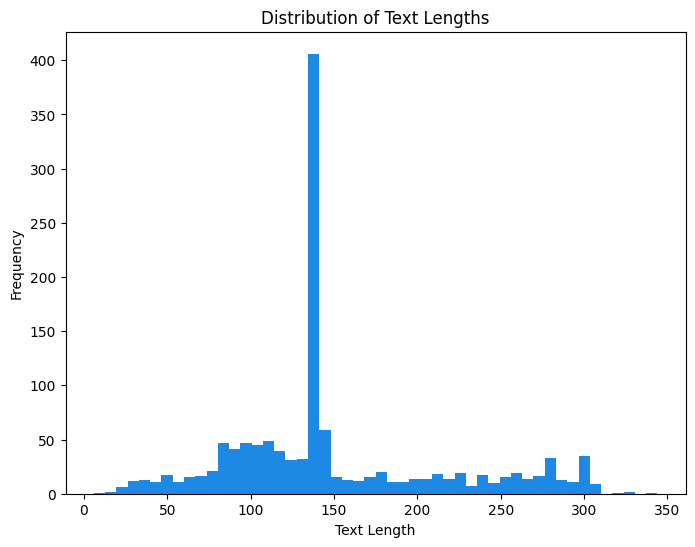

In [31]:
# Visualize text length distribution
plt.figure(figsize=(8, 6))
plt.hist(df_drop_na["length"], bins=50, color='#1E88E5')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

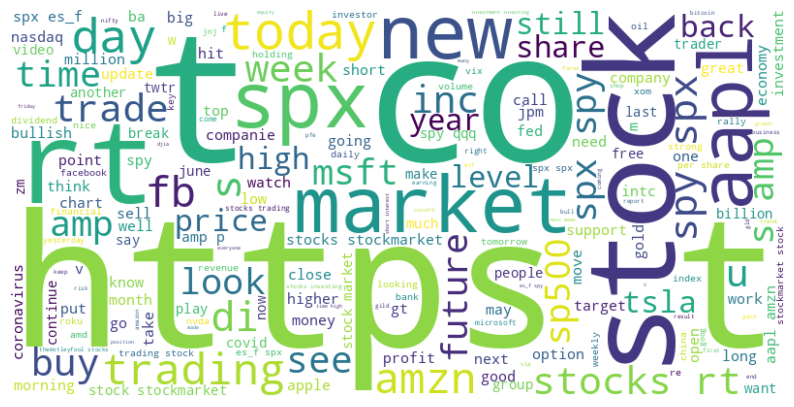

In [40]:
# checking most common words

# Remove stopwords
stop_words = set(stopwords.words('english'))
words = ' '.join(df['text']).lower().split()
filtered_words = [word for word in words if word not in stop_words]

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# checking for duplicates 
print(df_drop_na.duplicated().sum())
# there are not duplicates soo no need to remove them

# checking for outliers
print(df_drop_na["length"].describe())

0
count    1300.000000
mean      150.720769
std        65.836301
min         6.000000
25%       110.000000
50%       140.000000
75%       174.000000
max       344.000000
Name: length, dtype: float64


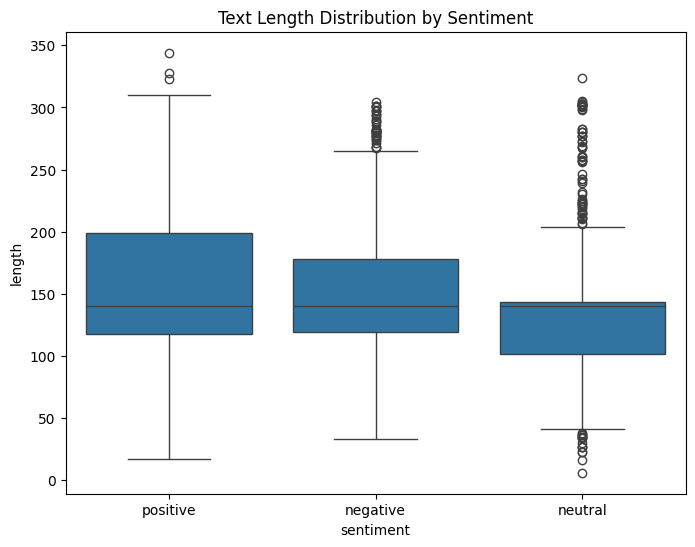

In [45]:
# Checking sentiment distribution by length
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='length', data=df_drop_na)
plt.title('Text Length Distribution by Sentiment')
plt.show()